In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
from sklearn import preprocessing
warnings.filterwarnings("ignore")


In [65]:
data=pd.read_csv('heart_2020_cleaned.csv')

In [66]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [67]:
data['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [69]:
data['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [70]:
columns=['BMI','PhysicalHealth','MentalHealth','SleepTime']

In [71]:
for i in columns:
    print(i, data[i].unique())

BMI [16.6  20.34 26.58 ... 62.42 51.46 46.56]
PhysicalHealth [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
SleepTime [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]


In [72]:
data.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


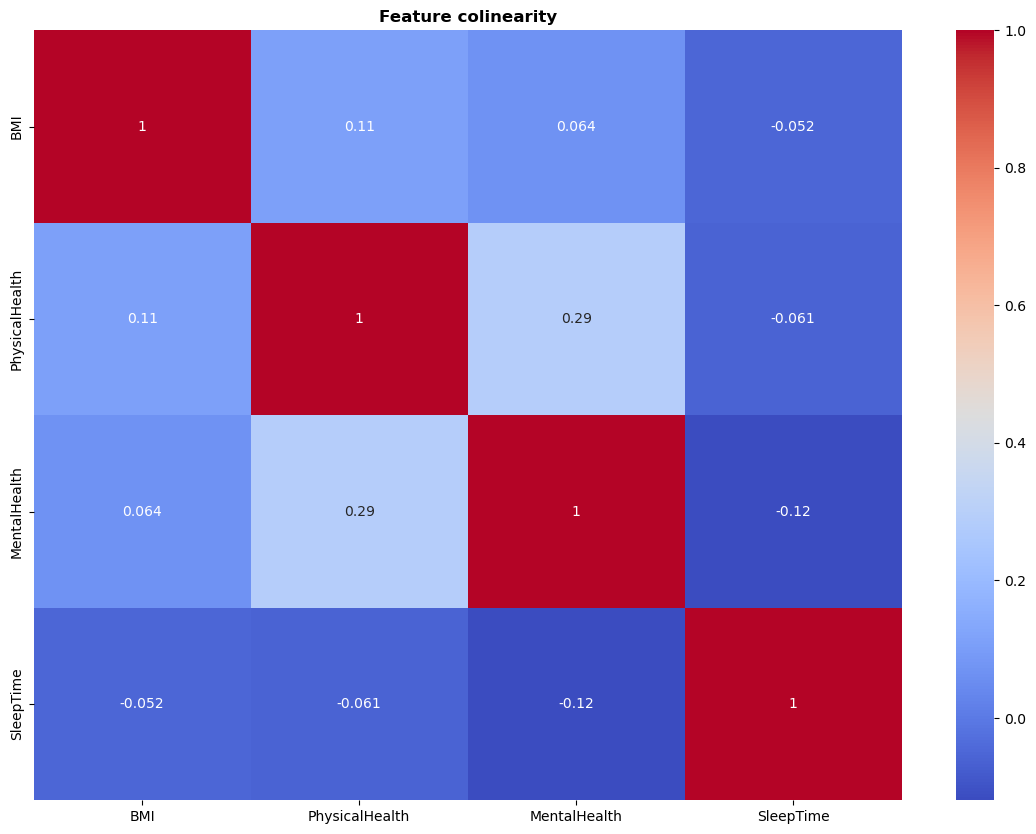

In [73]:
correlation_df= data.corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data=correlation_df, annot=True, cmap='coolwarm')
plt.title("Feature colinearity", fontweight='bold')
plt.show()

In [74]:
data['Sex'] = data['Sex'].map({'Male': 1, 'Female': 0})
data['Smoking']=data['Smoking'].map({'Yes': 1, 'No': 0})
data['AlcoholDrinking']=data['AlcoholDrinking'].map({'Yes': 1, 'No': 0})
data['Stroke']=data['Stroke'].map({'Yes': 1, 'No': 0})
data['DiffWalking']=data['DiffWalking'].map({'Yes': 1, 'No': 0})
data['PhysicalActivity']=data['PhysicalActivity'].map({'Yes': 1, 'No': 0})
data['Asthma']=data['Asthma'].map({'Yes': 1, 'No': 0})
data['KidneyDisease']=data['KidneyDisease'].map({'Yes': 1, 'No': 0})
data['SkinCancer']=data['SkinCancer'].map({'Yes': 1, 'No': 0})



In [75]:
data['AgeCategory']=data['AgeCategory'].str.replace("or older","")
import statistics
def get_median(x):
    split_list=x.split('-')
    flo_list=[float(i) for i in split_list]
    median=statistics.median(flo_list)
    return median

In [76]:
data['AgeCategory']=data['AgeCategory'].apply(get_median)

In [77]:
data=pd.get_dummies(data=data, columns=['Race'])

In [78]:
label_encoder = preprocessing.LabelEncoder()
data['GenHealth']= label_encoder.fit_transform(data['GenHealth']) 
data['Diabetic']=label_encoder.fit_transform(data['Diabetic'])

In [79]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,No,16.60,1,0,0,3.0,30.0,0,0,57.0,...,5.0,1,0,1,0,0,0,0,0,1
1,No,20.34,0,0,1,0.0,0.0,0,0,80.0,...,7.0,0,0,0,0,0,0,0,0,1
2,No,26.58,1,0,0,20.0,30.0,0,1,67.0,...,8.0,1,0,0,0,0,0,0,0,1
3,No,24.21,0,0,0,0.0,0.0,0,0,77.0,...,6.0,0,0,1,0,0,0,0,0,1
4,No,23.71,0,0,0,28.0,0.0,1,0,42.0,...,8.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,1,0,0,7.0,0.0,1,1,62.0,...,6.0,1,0,0,0,0,0,1,0,0
319791,No,29.84,1,0,0,0.0,0.0,0,1,37.0,...,5.0,1,0,0,0,0,0,1,0,0
319792,No,24.24,0,0,0,0.0,0.0,0,0,47.0,...,6.0,0,0,0,0,0,0,1,0,0
319793,No,32.81,0,0,0,0.0,0.0,0,0,27.0,...,12.0,0,0,0,0,0,0,1,0,0


<Axes: xlabel='HeartDisease'>

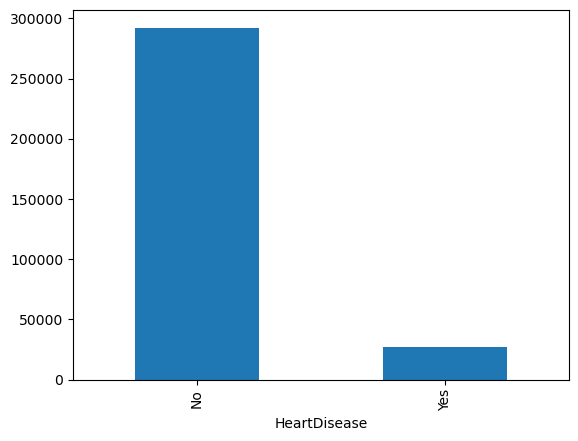

In [80]:
GroupedData=data.groupby(by= 'HeartDisease').size()
GroupedData.plot.bar()

In [81]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Race_American Indian/Alaskan Native',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White'],
      dtype='object')

In [82]:
X=data.drop('HeartDisease',axis=1)
Y=data['HeartDisease']

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,recall_score,f1_score,accuracy_score,precision_score

In [84]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [85]:
from collections import Counter
Counter(y_test)

Counter({'No': 58484, 'Yes': 5475})

              Logistic Regression

In [86]:
mysteps = [('ss',StandardScaler()),('rus',RandomUnderSampler(random_state = 1)),('lr',LogisticRegression(solver='saga'))]

m_pipe = Pipeline(steps = mysteps)

m_pipe.fit(x_train,y_train)


Pipeline(steps=[('ss', StandardScaler()),
                ('rus', RandomUnderSampler(random_state=1)),
                ('lr', LogisticRegression(solver='saga'))])

In [87]:
tr_xtest=m_pipe['ss'].transform(x_test)

In [88]:
predict_lr=m_pipe['lr'].predict(tr_xtest)

In [91]:

recall_lr=recall_score(y_test,predict_lr,pos_label='Yes')
recall_lr

0.7634703196347032

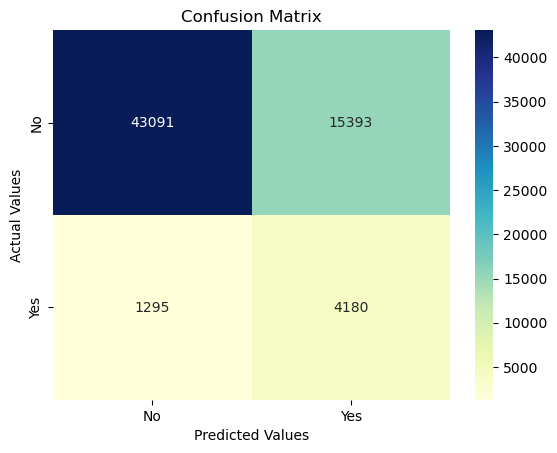

In [92]:
cm=confusion_matrix(y_test,predict_lr)
cm_matrix = pd.DataFrame(data=cm, columns=['No','Yes'],
                        index=['No','Yes'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

                             Support Vector Machine                             

In [93]:
mysteps = [('ss',StandardScaler()),('rus',RandomUnderSampler(random_state = 1)),('svm', SVC(kernel = 'rbf'))]

m_pipe = Pipeline(steps = mysteps)

m_pipe.fit(x_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('rus', RandomUnderSampler(random_state=1)), ('svm', SVC())])

In [96]:
tr_xtest=m_pipe['ss'].transform(x_test)

In [95]:
predict_svm=m_pipe['svm'].predict(tr_xtest)

In [212]:
recall_score(y_test,predict_svm,pos_label='Yes')

0.795068493150685

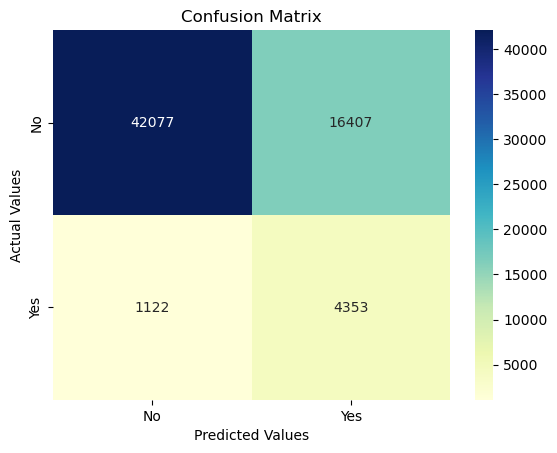

In [226]:
cm=confusion_matrix(y_test,predict_svm)
cm_matrix = pd.DataFrame(data=cm,columns=['No','Yes'], 
                         index=['No','Yes'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

                                   Decision Tree

In [214]:
mysteps = [('rus',RandomUnderSampler(random_state = 1)),('dt',DecisionTreeClassifier())]

m_pipe = Pipeline(steps = mysteps)

m_pipe.fit(x_train, y_train)

Pipeline(steps=[('rus', RandomUnderSampler(random_state=1)),
                ('dt', DecisionTreeClassifier())])

In [215]:
pre_dt=m_pipe['dt'].predict(x_test)

In [216]:
recall_score(y_test,pre_dt,pos_label='Yes')

0.656255707762557

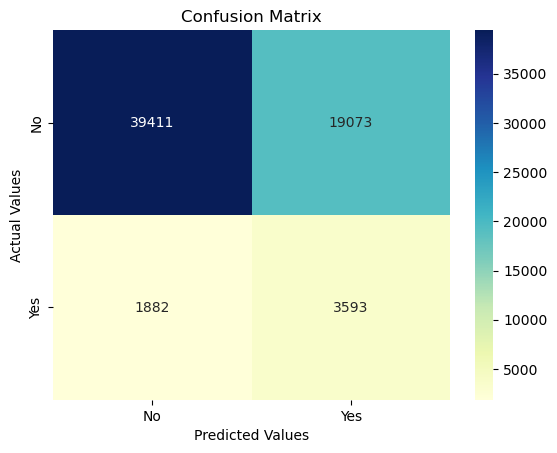

In [221]:
cm=confusion_matrix(y_test,pre_dt)
cm_matrix = pd.DataFrame(data=cm, index=['No','Yes'],
                        columns=['No','Yes'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

                                   Extra Trees Classifier

In [20]:

mysteps = [('rus',RandomUnderSampler(random_state = 1)),('etc',ExtraTreesClassifier())]

m_pipe = Pipeline(steps = mysteps)

m_pipe.fit(x_train, y_train)

Pipeline(steps=[('rus', RandomUnderSampler(random_state=1)),
                ('etc', ExtraTreesClassifier())])

In [23]:
pre_etc=m_pipe['etc'].predict(x_test)

In [24]:
recall_score(y_test,pre_etc,pos_label='Yes')

0.7426484018264841

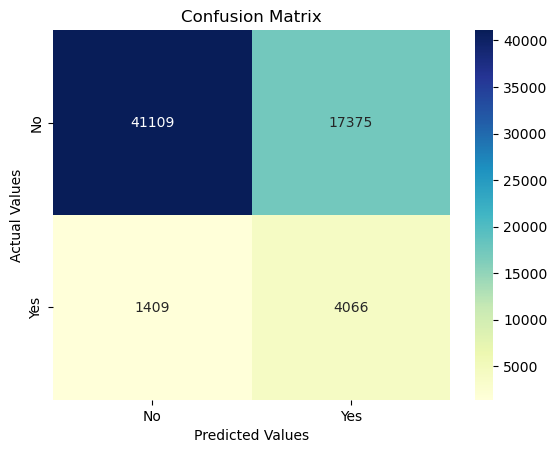

In [25]:
cm=confusion_matrix(y_test,pre_etc)
cm_matrix = pd.DataFrame(data=cm, columns=['No','Yes'],
                        index=['No','Yes'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

                                 Random Forest Classifier

In [26]:

mysteps = [('rus',RandomUnderSampler(random_state = 1)),('rf',RandomForestClassifier())]

m_pipe = Pipeline(steps = mysteps)

m_pipe.fit(x_train, y_train)

Pipeline(steps=[('rus', RandomUnderSampler(random_state=1)),
                ('rf', RandomForestClassifier())])

In [27]:
pre_rf=m_pipe['rf'].predict(x_test)

In [28]:
re_score=recall_score(y_test,pre_rf,pos_label='Yes')
re_score

0.7736986301369863

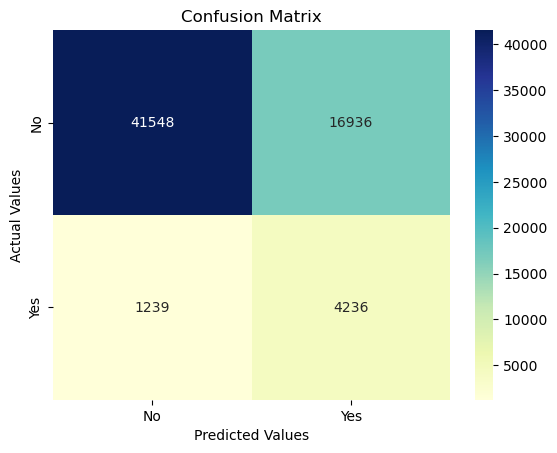

In [45]:
cm=confusion_matrix(y_test,pre_rf)
cm_matrix = pd.DataFrame(data=cm, columns=['No','Yes'],
                        index=['No','Yes'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

              Multinomial NB

In [97]:

mysteps = [('rus',RandomUnderSampler(random_state = 1)),('nb',MultinomialNB())]

m_pipe = Pipeline(steps = mysteps)

m_pipe.fit(x_train, y_train)


Pipeline(steps=[('rus', RandomUnderSampler(random_state=1)),
                ('nb', MultinomialNB())])

In [98]:
pre_nb=m_pipe['nb'].predict(x_test)

In [99]:
recall_nb_score=recall_score(y_test,pre_nb,pos_label='Yes')
recall_nb_score

0.39926940639269404

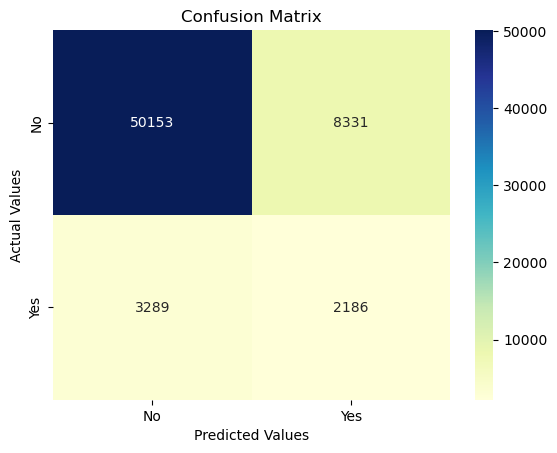

In [46]:
cm=confusion_matrix(y_test,pre_nb)
cm_matrix = pd.DataFrame(data=cm, columns=['No','Yes'],
                        index=['No','Yes'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

                                  Gaussian NB

In [100]:

mysteps = [('rus',RandomUnderSampler(random_state = 1)),('gnb',GaussianNB())]

m_pipe = Pipeline(steps = mysteps)

m_pipe.fit(x_train, y_train)


Pipeline(steps=[('rus', RandomUnderSampler(random_state=1)),
                ('gnb', GaussianNB())])

In [101]:
pre_gnb=m_pipe['gnb'].predict(x_test)

In [102]:
recall_gnb_score=recall_score(y_test,pre_gnb,pos_label='Yes')
recall_nb_score

0.39926940639269404

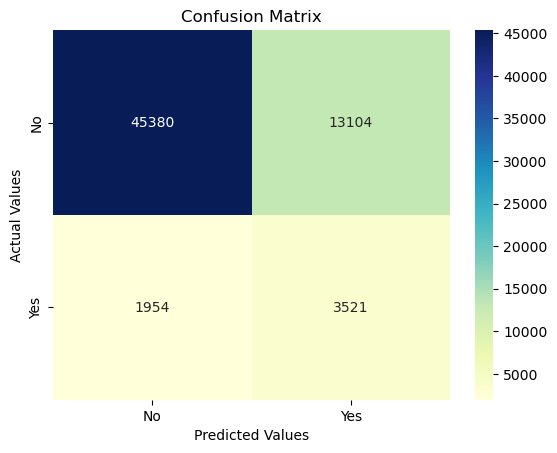

In [47]:
cm=confusion_matrix(y_test,pre_gnb)
cm_matrix = pd.DataFrame(data=cm, columns=['No','Yes'],
                        index=['No','Yes'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

                         Gradient Boosting Classifier               

In [40]:
mysteps = [('rus',RandomUnderSampler(random_state = 1)),('gbc',GradientBoostingClassifier())]

m_pipe = Pipeline(steps = mysteps)

m_pipe.fit(x_train, y_train)


Pipeline(steps=[('rus', RandomUnderSampler(random_state=1)),
                ('gbc', GradientBoostingClassifier())])

In [42]:
pre_gbc=m_pipe['gbc'].predict(x_test)

In [43]:
recall_gbc_score=recall_score(y_test,pre_gbc,pos_label='Yes')
recall_gbc_score

0.7974429223744293

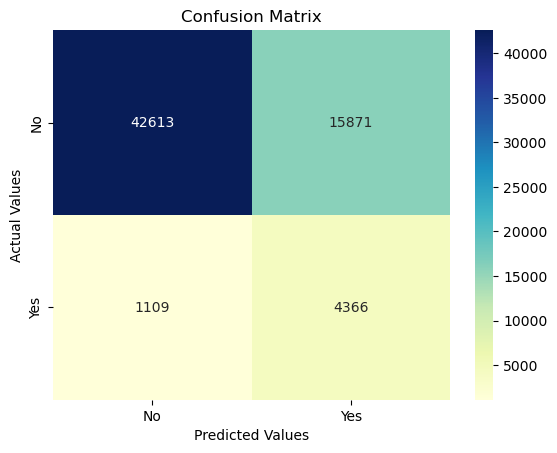

In [48]:
cm=confusion_matrix(y_test,pre_gbc)
cm_matrix = pd.DataFrame(data=cm, columns=['No','Yes'],
                        index=['No','Yes'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
                                    AdaBoost Classifier

In [49]:
mysteps = [('rus',RandomUnderSampler(random_state = 1)),('abc',AdaBoostClassifier(base_estimator = LogisticRegression(max_iter = 10000), n_estimators = 100, learning_rate = 0.3))]

m_pipe = Pipeline(steps = mysteps)

m_pipe.fit(x_train, y_train)


Pipeline(steps=[('rus', RandomUnderSampler(random_state=1)),
                ('abc',
                 AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=10000),
                                    learning_rate=0.3, n_estimators=100))])

In [50]:
pre_abc=m_pipe['abc'].predict(x_test)

In [51]:
recall_gbc_score=recall_score(y_test,pre_abc,pos_label='Yes')
recall_abc_score

0.7724200913242009

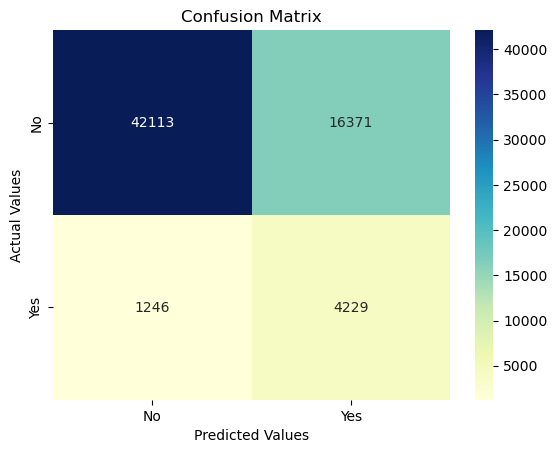

In [53]:
cm=confusion_matrix(y_test,pre_abc)
cm_matrix = pd.DataFrame(data=cm, columns=['No','Yes'],
                        index=['No','Yes'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

               XGB Boosting

In [55]:
X=data.drop('HeartDisease',axis=1)
Y=data['HeartDisease']

In [56]:
Y=Y.map({'Yes': 1, 'No': 0})

In [57]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [58]:
from imblearn.under_sampling import RandomUnderSampler

from imblearn.pipeline import Pipeline

mysteps = [('rus',RandomUnderSampler(random_state = 1)),('XGB',XGBClassifier())]

m_pipe = Pipeline(steps = mysteps)

m_pipe.fit(x_train, y_train)

Pipeline(steps=[('rus', RandomUnderSampler(random_state=1)),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [59]:
y_xgb_predict=m_pipe['XGB'].predict(x_test)

In [60]:
re_score=recall_score(y_test,y_xgb_predict,pos_label=1)

In [61]:
re_score

0.7970776255707762

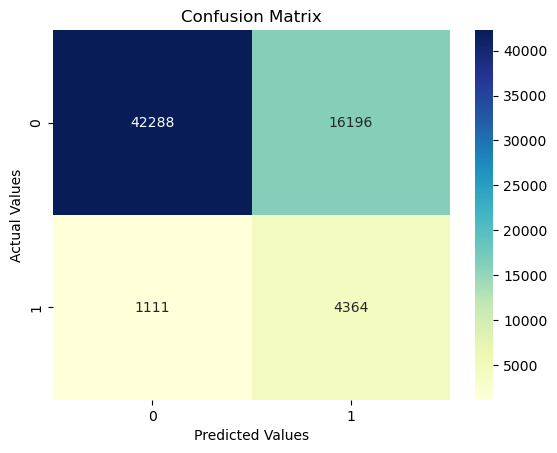

In [62]:
cm=confusion_matrix(y_test,y_xgb_predict)
cm_matrix = pd.DataFrame(data=cm, columns=['0','1'],
                        index=['0','1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [104]:

comparison={'Models':['Logistic Regreesion', 'Support Vector Machine','Decision Tree','ExtraTrees','Random Forest','Multinomial NB','Gaussian NB','Gradient Boost','Ada Boost','XGB'],
            'Recall_Score':[0.7634703196347032,0.795068493150685,0.656255707762557,0.7426484018264841,0.7736986301369863,0.39926940639269404,0.39926940639269404,0.7974429223744293,0.7724200913242009,0.7970776255707762]}

In [109]:
df=pd.DataFrame(comparison)
df.sort_values(by=['Recall_Score'],ascending=False)

,Models,Recall_Score
7,Gradient Boost,0.797443
9,XGB,0.797078
1,Support Vector Machine,0.795068
4,Random Forest,0.773699
8,Ada Boost,0.772420
0,Logistic Regreesion,0.763470
3,ExtraTrees,0.742648
2,Decision Tree,0.656256
5,Multinomial NB,0.399269
6,Gaussian NB,0.399269


To conclude from all these models.. The Gradient Boost Model has best recall score..The Dataset is highly imbalanced... The Dataset has two classes in the output as 'Yes' and 'No'.90+% of data is mapping to the class No and only 8% of data is mapping to the class 'Yes'..

In [ ]:
The imbalance nature of the data resticts  me to Recall_Score.. Optimisation of the Models are determined based on the recall score.. it was aimied at reducing false negatives..